In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

class_names = ['toxic']
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)

train_target = train['toxic']

X_train, X_test, Y_train, Y_test = train_test_split( train_features, train_target, test_size=0.2, random_state=42)

In [0]:
##Logistic Regression

In [0]:
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train, Y_train)
predictions = classifier.predict_proba(X_test)[:, 1]

roc_curve 0.9576519724263249


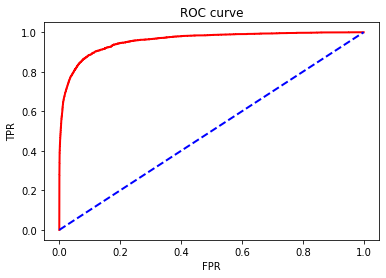

In [0]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));
##True and False Positive Rates
fpr, tpr,_=roc_curve(Y_test,predictions)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print("accuracy {}".format(accuracy_score(Y_test,predictions)));

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])



accuracy 0.9374588751370829
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28859
           1       0.98      0.36      0.52      3056

    accuracy                           0.94     31915
   macro avg       0.96      0.68      0.74     31915
weighted avg       0.94      0.94      0.92     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28832    27
       Toxic          1969  1087

In [0]:
import pandas as pd
data = pd.read_csv('/content/TestFile.csv')
data = data.values
X_train = data[0:14,0]
print(X_train)
encoded = word_vectorizer.transform(X_train)
predictions = classifier.predict(encoded)
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

['I do not think you are a bad human being your circumstances made you that '
 'He had killed many people in the past and would continue to kill if we do not do somehing about it'
 'You need some help, his retaeded brother was brave enough to serve in the military '
 'The word fuck is very inappropriate please refrain from using. It leaves a bad impression.'
 'The murder rates for those cities are high I would suggest looking after your family. These psychopaths are dagerous, keep yourself safe.'
 'In a time were rape and harassment are widespread, we need to stand up againt the bullies.'
 'I will kill your faimily, nice good wonderful.'
 "Slavery is forbidden in Islam?  That seems to run counter to history.  Weren't the Mamluks, simply to mention one group, former slaves?"
 'The original Homophobia in the Black Diasporic community article is god awful.  So I moved that articles information here.'
 'refuse to be open to other people and ideas'
 'The anus is, in fact, part of the penis.